In [2]:
# Utilitaries

def set_to_bin(S):
    return s²um(2^i for i in S)

def bin_to_set(k):
    K, x, S = int(k), 0, set()
    while K > 0:
        if K % 2 == 1:
            S.add(x)
        K //= 2
        x += 1
    return S

def intervals_of_set(S):
    if len(S) == 0:
        return []
    L = list(S)
    L.sort()
    I = []
    x0, x1 = L[0], L[0]
    while len(L) != 0:
        y = L.pop(0)
        if y in {x1, x1 + 1}:
            x1 = y
        else:
            I.append((x0, x1))
            x0, x1 = y, y
    I.append((x0, x1))
    return I

def sum_list(LL):
    M = []
    for L in LL:
        M += L
    return M

def sum_str(ss):
    t = ''
    for s in ss:
        t += s
    return t

In [3]:
def submodular_matrix(n):
    V = []
    for S in Subsets(range(n)):
        if len(S) >= 2:
            for A in Subsets(S, 2):
                A = set(A)
                u = A.pop()
                v = A.pop()
                x = [0] * (2^n)
                x[set_to_bin(S)] = 1
                x[set_to_bin(S.difference({u, v}))] = 1
                x[set_to_bin(S.difference({u}))] = -1
                x[set_to_bin(S.difference({v}))] = -1
#                 print(S, u, v, x)
                V.append(x)
    return matrix(V).T

In [4]:
def submodular_cone(n):
    Forcage = []
    Forcage.append([0] + [int(len(S) == n) for S in Subsets(range(n))])
    Forcage.append([0] + [int(len(S) == 0) for S in Subsets(range(n))])
#     Forcage.append([0] + [int(len(S) == n) for S in Subsets(range(n))])
    for i in range(n-1):
        rel = [0] * (2^n)
        rel[set_to_bin({i})] = 1
        Forcage.append([0] + rel)
#     print([[0] + list(vector(C)) for C in submodular_matrix(n).columns()])
    return Polyhedron(eqns = Forcage, ieqs = [[0] + list(vector(C)) for C in submodular_matrix(n).columns()])

def submodular_polytope(n):
    Forcage = []
    Forcage.append([-n*(n+1)/2] + [int(len(S) == n) for S in Subsets(range(n))])
    Forcage.append([0] + [int(len(S) == 0) for S in Subsets(range(n))])
#     Forcage.append([0] + [int(len(S) == n) for S in Subsets(range(n))])
    for i in range(n):
        rel = [0] * (2^n)
        rel[set_to_bin({i})] = 1
        Forcage.append([-1] + rel)
#     print([[0] + list(vector(C)) for C in submodular_matrix(n).columns()])
    return Polyhedron(eqns = Forcage, ieqs = [[0] + list(vector(C)) for C in submodular_matrix(n).columns()])


def submodular_cone_just_print(n):
    Forcage = []
    Forcage.append([-n*(n+1)/2] + [int(len(S) == n) for S in Subsets(range(n))])
    Forcage.append([0] + [int(len(S) == 0) for S in Subsets(range(n))])
#     Forcage.append([0] + [int(len(S) == n) for S in Subsets(range(n))])
    for i in range(n-1):
        rel = [0] * (2^n)
        rel[set_to_bin({i})] = 1
        Forcage.append([-1] + rel)
#     print([[0] + list(vector(C)) for C in submodular_matrix(n).columns()])
    return Forcage, [list(vector(C)) for C in submodular_matrix(n).columns()]

def submodular_cone_graphical_zonotope(G):
    n = G.num_verts()
    Forcage = []
    Forcage.append([-n*(n+1)/2] + [int(len(S) == n) for S in Subsets(range(n))])
    Forcage.append([0] + [int(len(S) == 0) for S in Subsets(range(n))])
#     Forcage.append([0] + [int(len(S) == n) for S in Subsets(range(n))])
    for i in range(n-1):
        rel = [0] * (2^n)
        rel[set_to_bin({i})] = 1
        Forcage.append([-1] + rel)
#     print([[0] + list(vector(C)) for C in submodular_matrix(n).columns()])
    Iq = []
    for k in range(2^n):
        S = bin_to_set(k)
        for A in Subsets(S, 2):
            u, v = A
            rel = [0] * (2^n)
            rel[set_to_bin(S)] = 1
            rel[set_to_bin(S.difference({u}))] = -1
            rel[set_to_bin(S.difference({v}))] = -1
            rel[set_to_bin(S.difference({u, v}))] = 1
            if not G.has_edge((u, v)):
                Forcage.append([0] + rel)
            elif all(G.has_edge((u, w)) and G.has_edge((v, w)) for w in S.difference({u, v})):
                Iq.append([0] + rel)
    return Polyhedron(eqns = Forcage, ieqs = [[0] + list(vector(C)) for C in submodular_matrix(n).columns()], verbose=True)


def iota_vec(S, n):
    return [-1 + 2*int(i in S) for i in range(n)]

def e_S(S, n):
    return [int(i in S) for i in range(n)]

def g_vec(S, n):
    return [n*int(i in S) - len(S) for i in range(n)]

def P_h(h, n = -1):
    if n == -1:
        n = int(log(len(h))/log(2))
    Ieqs = []
    for j in range(2^n):
        Ieqs.append([-h[j]] + g_vec(bin_to_set(j), n))
#     return Polyhedron(eqns = [[-0] + [1]*n], ieqs = Ieqs)
    return Polyhedron(eqns = [[-h[-1]] + [1]*n], ieqs = Ieqs)

In [123]:
def graphical_zonotope(G):
    n = G.num_verts()
    return sum(Polyhedron(vertices=[[int(i == e[0]) for i in range(n)], [int(i == e[1]) for i in range(n)]]) for e in G.edges())

def Delta(H, n = -1):
    if n == -1:
        n = max(H)
    return Polyhedron(vertices = [[int(i == x) for i in range(n)] for x in H])

def hypergraphic_polytope(HH, n = -1):
    """Also for nestohedron"""
    if n == -1:
        n = max(max(H) for H in HH)
    return sum(Delta(H, n) for H in HH)

def matroid_polytope(M, n = -1):
    """M given as a list of bases"""
    if n == -1:
        n = max(max(B) for B in M)
    return Polyhedron(vertices = [[int(i in B) for i in range(n)] for B in M])

def removahedron(SS, n = -1):
    """Be careful for the eqns you wish..."""
    if n == -1:
        n = max(max(S) for S in SS)
    Eq = [[-n*(n+1)/2] + [1]*n]
    Iq = [[-(len(S)+1)*len(S)/2] + [int(i in S) for i in range(n)] for S in SS]
#     print(Polyhedron(eqns=Eq, ieqs=Iq))
    return Polyhedron(eqns=Eq, ieqs=Iq)

def is_generalized_permutahedron(P):
    for u, v, _ in P.graph().edges():
        w = u.vector() - v.vector()
        supp = [i for i in range(len(w)) if w[i] != 0]
        if len(supp) != 2 or w[supp[0]] != - w[supp[1]]:
            return False
    return True

In [7]:
# Basic functions

def all_arcs(n = 5):
    """Iterator over all arcs on `n` points"""
    for a in range(n):
        for b in range(a+1, n):
            for S in Subsets(range(a+1, b)):
                yield (a, b, set(S), set(range(a+1, b)).difference(S))

def arc_ideal_generated_by(Alpha):
    """Return the ideal (for dominance/restriction relation) generated by the list of arc `Alpha` (works also if `Alpha` is just an arc an not given as a list)"""
    if type(Alpha) == tuple:
        L = [Alpha]
    else:
        L = list(Alpha)
    n = max(alpha[1] for alpha in L)
    D = {(a, b) : [] for a in range(n+1) for b in range(a+1, n+1)}
    for a, b, S, U in L:
        for c in range(a, b+1):
            for d in range(c+1, b+1):
                beta = (c, d, S.intersection(set(range(c+1, d))), U.intersection(set(range(c+1, d))))
                if not beta in D[(c, d)]:
                    D[(c, d)].append(beta)
    L = []
    for l in D.values():
        L += l
    return L

def is_dominating_arc(alpha, beta):
    """Dominance/restriction relation between arcs (return whether `beta` is a restriction of `alpha` or not)"""
    return (alpha[0] <= beta[0]) and (beta[1] <= alpha[1]) and (alpha[2].intersection(set(range(beta[0]+1, beta[1]))) == beta[2])

def arc_dominance_poset(n):
    """Return the poset obtained from the dominance/restriction relation"""
    return Poset(([(a, b, frozenset(S), frozenset(U)) for (a, b, S, U) in all_arcs(n)], lambda alpha, beta : is_dominating_arc(beta, alpha)))

def arc_ideals_poset(n):
    """Return the lattice of (downward) ideals (or down sets) of the dominance poset"""
    arc_Po = arc_dominance_poset(n)
    return arc_Po.order_ideals_lattice()

In [8]:
def all_alterning_matching(X, Y):
    G = DiGraph()
    for x in X:
        G.add_edges((x, y) for y in Y if x < y)
    for y in Y:
        G.add_edges((y, x) for x in X if x > y)
    G.add_edges(("start", x) for x in X)
    G.add_edges((y, "end") for y in Y)
    G.add_edge(("start", "end"))
#     G.show()
    for path in G.all_paths_iterator(["start"], ["end"]):
        lp = len(path)
        yield [path[i] for i in range(1, lp-1, 2)], [path[j] for j in range(2, lp-1, 2)]

def shard_polytope(alpha, n = -1):
    a, b, A, B = alpha
    if n == -1:
        n = b+1
    return Polyhedron(vertices = [[int(i in am[0]) - int(i in am[1]) for i in range(n)] for am in all_alterning_matching([a]+list(alpha[2]), list(alpha[3])+[b])])

def quotientope(Alpha, n):
    return sum(shard_polytope(alpha, n) for alpha in Alpha)

In [9]:
def oriented_graph(P, c):
    G = DiGraph()
    for (u, v, lab) in P.graph().edges():
        gap = v.vector().dot_product(c) - u.vector().dot_product(c)
        if gap > 0:
            G.add_edge((u, v, gap))
        else:
            G.add_edge((v, u, -gap))
    return G

In [10]:
def is_matroid_as_bases(BB):
    return len(BB) != 0 and all(all(any(A.union({b}).difference({a}) in BB for b in B.difference(A)) for a in A.difference(B)) for A in BB for B in BB if A != B)

def all_matroids(n = 4):
    for k in range(1, n+1):
        for BB in Subsets(Subsets(range(n), k)):
            if is_matroid_as_bases([set(X) for X in BB]):
                yield tuple(tuple(X) for X in BB)

In [11]:
def is_building_set(B):
    lB = len(B)
    Bcopy = [set(X) for X in B]
    for ind1 in range(lB):
        for ind2 in range(ind1+1, lB):
            X, Y = Bcopy[ind1], Bcopy[ind2]
            if len(X.intersection(Y)) > 0:
                if not X.union(Y)  in Bcopy:
                    return False
    return True

In [12]:
def my_GP_is(kl, question):
    name = "/home/sage/Downloads/Non_iso_GP_n=H/K-face/L_data.txt".replace("H",str(n)).replace("K",str(k)).replace('L',str(l))
    fi = open(name, 'r')
    for _ in range(10):
        fi.readline()
    Prop = fi.readline()
    fi.close()
#     print(Prop)
    return question in Prop

In [13]:
def braid_merging(V, n):
    di = {tuple(v.vector()) : [] for v in V}
    for sigma in Permutations(n):
        v_sig = vector(sigma)
        m = v_sig.dot_product(V[0].vector())
        memo = tuple(V[0])
        for v in V[1:]:
            c = v_sig.dot_product(v.vector())
            if c > m:
                m = c
                memo = tuple(v.vector())
        di[memo].append(sigma)
    return di

def braid_action(di, SigEps):
    sig, eps = SigEps
#     print(sig, eps, type(sig), type(eps))
    if eps == 1:
        return {x : [tau.left_action_product(sig) for tau in di[x]]  for x in di}
    n = len(sig)
    rev = Permutation(range(n, 0, -1))
    return {x : [rev.left_action_product(tau.left_action_product(sig)) for tau in di[x]]  for x in di}

def all_braid_equivalents(di):
    n = len(di.keys().__iter__().__next__())
    for eps in {+1, -1}:
        for sig in Permutations(n):
            yield braid_action(di, (sig, eps))

In [14]:
def are_braid_equivalent(di1, di2, verbose = False):
    """I hope this works... Otherwise, do brute-force by testing all the orbit of your di1 and checking if di2 appears."""
    if not len(di1) == len(di2):
        if verbose:
            print("polytopes don't have same number of vertices.")
        return False
    
    n = len(di1.keys().__iter__().__next__())
    
    eq_cl1 = list(di1.values())
    eq_cl1.sort(key = lambda x : len(x))
    le, EC1 = 0, [[]]
    for x in eq_cl1:
        while len(x) > le:
            le += 1
            EC1.append([])
        EC1[-1].append(x)
    
    eq_cl2 = list(di2.values())
    eq_cl2.sort(key = lambda x : len(x))
    le, EC2 = 0, [[]]
    for x in eq_cl2:
        while len(x) > le:
            le += 1
            EC2.append([])
        EC2[-1].append(x)
    
    if not [len(Cl) for Cl in EC1] == [len(Cl) for Cl in EC2]:
        if verbose:
            print("polytopes don't have same merging type.")
        return False
    
    id_n = Permutations(n).identity()
    rev = Permutation(range(n, 0, -1))
    #print(id_n, rev)
    for x in di1:
        if id_n in di1[x]:
            break
    cl_id = di1[x]
    lcl = len(cl_id)
    #print(cl_id, lcl)
    for cl in EC2[lcl]:
        for sig in cl:
            L1 = [tau.left_action_product(sig) for tau in cl_id]
            L1.sort()
            L2 = list(cl)
            L2.sort()
            if L1 == L2:
                di1_acted = braid_action(di1, (sig, 1))
                for L in di1_acted.values():
                    L.sort()
                val_di1 = {L[0] : L for L in di1_acted.values()}
                di2_ = {x : list(di2[x]) for x in di2}
                for L in di2_.values():
                    L.sort()
                val_di2 = {L[0] : L for L in di2_.values()}
                b = val_di1 == val_di2
                #print(sig, 1, cl_id)
                #print(val_di1, val_di2)
                if b:
                    if verbose:
                        print((sig, 1))
                    return True
            
            sig_ = rev.inverse().left_action_product(sig)
            L1 = [rev.left_action_product(tau.left_action_product(sig_)) for tau in cl_id]
            L1.sort()
            L2 = list(cl)
            L2.sort()
            if L1 == L2:
                di1_acted = braid_action(di1, (sig_, -1))
                for L in di1_acted.values():
                    L.sort()
                val_di1 = {L[0] : L for L in di1_acted.values()}
                di2_ = {x : list(di2[x]) for x in di2}
                for L in di2_.values():
                    L.sort()
                val_di2 = {L[0] : L for L in di2_.values()}
                b = val_di1 == val_di2
                if b:
                    if verbose:
                        print((sig, -1))
                    return True
    return False

In [172]:
def redress_normals_into_01(P, only_ieqs = False):
    n = P.ambient_dim()
    Cube = Polyhedron(ieqs = [[0] + [int(i == j) for i in range(n)] for j in range(n)] + [[1] + [-int(i == j) for i in range(n)] for j in range(n)])
    #print(Cube)
    #print(Polyhedron(lines = [list(h.vector())[1:] for h in P.Hrepresentation() if h.is_equation()]))
    eq = [list(g.vector())[1:] for g in P.Hrepresentation() if g.is_equation()]
    R = Cube.intersection(Polyhedron(lines = eq))
    Vforbidden = R.vertices()
    
    Iq_classes = []
    for h in P.Hrepresentation():
        if h.is_inequality():
            Iq_classes.append([])
            Rr = Cube.intersection(Polyhedron(rays = [-h.vector()[1:]], lines = eq))
            for v in Rr.vertices():
                if not v in Vforbidden:
                    Iq_classes[-1].append(v.vector())
    if only_ieqs:
        return Iq_classes
    
    Eq_bases = []
    d = P.dim()
    for S in Subsets(Vforbidden, n - d):
        B = [v.vector() for v in S]
        if Matrix(B).rank() == n - d:
            Eq_bases.append(B)
    
    return Eq_bases, Iq_classes

def is_interval(S):
    m, M = min(S), max(S)
    return S == set(range(m, M+1))

def support(v):
    return {i for i in range(n) if v[i] != 0}

def is_cyclic_interval_vector(v):
    S = support(v)
    return len(S) == 0 or len(S) == len(v) or is_interval(S) or is_interval(set(range(len(v))).difference(S))

def is_alcoved_polytope(P):
    Eq_bases, Iq_classes = redress_normals_into_01(P)
    return any(all(is_cyclic_interval_vector(v) for v in B) for B in Eq_bases) and all(any(is_cyclic_interval_vector(v) for v in iq) for iq in Iq_classes)

def is_positroid(M, n=-1):
    if n == -1:
        n = max(max(B) for B in M)
    return is_alcoved_polytope(matroid_polytope(M, n))

def perm_vec(v, sig):
    return vector([v[sig[i]] for i in range(len(v))])

def is_alcoved_polytope_symmetrically(P, verbose = False):
    n = P.ambient_dim()
    Eq_bases, Iq_classes = redress_normals_into_01(P)
    for sig in Permutations(range(n)):
        b = any(all(is_cyclic_interval_vector(perm_vec(v, sig)) for v in B) for B in Eq_bases) and all(any(is_cyclic_interval_vector(perm_vec(v, sig)) for v in iq) for iq in Iq_classes)
        if b:
            if verbose:
                print(sig)
            return True
    return False

In [49]:
# Helper

import os
from time import localtime

print( str(localtime()[3])+'h'+str(localtime()[4]) )


# os.makedirs("/home/sage/Downloads/All_GP_n=H/K-face".replace("K",str(k-1)).replace("H",str(n)), exist_ok=True)

n, k = 3, 1

cur_repo = os.getcwd()
name = cur_repo + "/Downloads/All_GP_n=H/K-face".replace("K",str(k)).replace("H",str(n))
print(name)

13h55
/home/sage/Downloads/All_GP_n=3/1-face


In [184]:
# TEST

di1 = {(0, 0, 0): [[1, 2, 3], [1, 3, 2], [2, 1, 3]], (1, 0, -1): [[2, 3, 1], [3, 1, 2], [3, 2, 1]]}
di1 = {x : [Permutation(p) for p in di1[x]] for x in di1}
for dii in all_braid_equivalents(di1):
    print(are_braid_equivalent(di1, dii, verbose = True))

([1, 2, 3], 1)
True
([1, 3, 2], 1)
True
([2, 1, 3], 1)
True
([2, 3, 1], 1)
True
([3, 1, 2], 1)
True
([3, 2, 1], 1)
True
([3, 2, 1], 1)
True
([3, 1, 2], 1)
True
([2, 3, 1], 1)
True
([2, 1, 3], 1)
True
([1, 3, 2], 1)
True
([1, 2, 3], 1)
True


In [185]:
# TEST

di1 = {(0, 1, -1): [[1, 2, 3], [1, 3, 2]], (1, 1, -2): [[2, 3, 1], [3, 2, 1]], (1, 0, -1): [[2, 1, 3], [3, 1, 2]]}
di1 = {x : [Permutation(p) for p in di1[x]] for x in di1}
for dii in all_braid_equivalents(di1):
    print(are_braid_equivalent(di1, dii, verbose = True))

([1, 2, 3], 1)
True
([1, 3, 2], 1)
True
([2, 1, 3], 1)
True
([2, 3, 1], 1)
True
([3, 1, 2], 1)
True
([3, 2, 1], 1)
True
([3, 2, 1], -1)
True
([3, 1, 2], -1)
True
([2, 3, 1], -1)
True
([2, 1, 3], -1)
True
([1, 3, 2], -1)
True
([1, 2, 3], -1)
True


In [14]:
# n = 3, all

n = 3

print(str(localtime()[3])+'h'+str(localtime()[4]), "start DC")
DC = submodular_cone(n)
print(DC)

print(str(localtime()[3])+'h'+str(localtime()[4]), "start FL")
FL = DC.face_lattice()
print(FL)

10h29 start DC
A 4-dimensional polyhedron in QQ^8 defined as the convex hull of 1 vertex and 5 rays
10h29 start FL
Finite lattice containing 23 elements


In [16]:
n = 3
lens = {k : 0 for k in range(1, 2^n - n)}

for F in FL:
    k = F.dim()
    if F.dim() >= 1:
        os.makedirs("/home/sage/Downloads/All_GP_n=H/K-face".replace("K",str(k)).replace("H",str(n)), exist_ok=True)
        h = sum(r.vector() for r in F.rays())
            
        lens[k] += 1
        l = lens[k]
        P = P_h(h)
        V = [v.vector() for v in P.vertices()]
        deter = lcm(sum_list([x.denominator() for x in v] for v in V))
        V = [deter * v for v in V]
        name = cur_repo + "/Downloads/All_GP_n=H/K-face/L.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        fi = open(name, 'w')
        for v in V:
            fi.write(str(v) + '\n')
        fi.close()
        
        print(h)
        name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
        fi = open(name, 'a')
        fi.write(str(deter * h) + '\n')
        fi.close()
        print(P == P_h(h))
        print()
print(lens)

(0, 0, 0, 0, -1, 0, -1, 0)
True

(0, 0, 0, 1, -1, -1, -1, 0)
True

(0, 0, 0, 1, -2, -1, -2, 0)
True

(0, 0, 0, 1, -2, -1, -1, 0)
True

(0, 0, 0, 1, -3, -1, -2, 0)
True

(0, 0, 0, 2, -3, -2, -2, 0)
True

(0, 0, 0, 2, -4, -2, -3, 0)
True

(0, 0, 0, 0, -1, -1, 0, 0)
True

(0, 0, 0, 0, -2, -1, -1, 0)
True

(0, 0, 0, 1, -2, -2, -1, 0)
True

(0, 0, 0, 1, -3, -2, -1, 0)
True

(0, 0, 0, 1, -4, -2, -2, 0)
True

(0, 0, 0, 2, -4, -3, -2, 0)
True

(0, 0, 0, 0, -1, -1, -1, 0)
True

(0, 0, 0, 0, -2, -1, -2, 0)
True

(0, 0, 0, 1, -2, -2, -2, 0)
True

(0, 0, 0, 1, -3, -2, -3, 0)
True

(0, 0, 0, 0, -2, -2, -1, 0)
True

(0, 0, 0, 0, -3, -2, -2, 0)
True

(0, 0, 0, 1, -3, -3, -2, 0)
True

(0, 0, 0, 2, -6, -4, -4, 0)
True

{1: 5, 2: 9, 3: 6, 4: 1}


In [40]:
print(lens)

{1: 5, 2: 9, 3: 6, 4: 1}


In [17]:
n = 3
for k in range(1, 2^n - n):
    l = 0
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
    fi = open(name, 'r')
    for li in fi.readlines():
        l += 1
        name2 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        h = vector(eval(li))
        P = P_h(h)
        V = P.vertices()
        fi2 = open(name2, 'w')
        fi2.write(str(braid_merging(V, n)))
        fi2.close()
    fi.close()

In [18]:
n = 3
for k in range(1, 2^n - n):
    print("k =", k)
    l = 0
    DI = []
    Mem, aMem = [], []
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
    fi = open(name, 'r')
    for li in fi.readlines():
        l += 1
        name2 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        fi2 = open(name2, 'r')
        di = eval(fi2.readline())
        fi2.close()
        di = {x : [Permutation(p) for p in di[x]] for x in di}
#         print(di)
        for L in di.values():
            L.sort()
        val_di = {L[0] : L for L in di.values()}
        b, i = False, 0
        while not b and i < len(DI):
            b = DI[i] == val_di
            i += 1
        if b:
#             print("here")
            aMem.append(Mem[i-1])
        else:
            aMem.append(l)
            for dii in all_braid_equivalents(di):
                for L in dii.values():
                    L.sort()
                val_dii = {L[0] : L for L in dii.values()}
#                 print(val_dii)
                DI.append(dict(val_dii))
                Mem.append(l)
#                 print()
    print(aMem)
    name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("K",str(k)).replace("H",str(n))
    fi3 = open(name3, 'w')
    fi3.write(str(aMem))
    fi3.close()
#         print(DI)
#         fi2 = open(name2, 'w')
#         fi2.write(str(braid_merging(V, n)))
#         fi2.close()
    fi.close()


k = 1
[1, 1, 3, 1, 3]
k = 2
[1, 2, 2, 1, 1, 2, 2, 2, 2]
k = 3
[1, 1, 1, 1, 1, 1]
k = 4
[1]


In [108]:
print(sig, tau)
min([sig, tau])

[3, 2, 1] [2, 3, 1]


[2, 3, 1]

In [19]:
print(P)
P.show()
for h in P.Hrepresentation():
    print(h)
print()
for v in P.vertices():
    print(v)

A 2-dimensional polyhedron in QQ^3 defined as the convex hull of 6 vertices


Graphics3d Object

An equation (1, 1, 1) x + 0 == 0
An inequality (-1, 0, 0) x + 4 >= 0
An inequality (-1, -1, 0) x + 6 >= 0
An inequality (0, 1, 0) x + 0 >= 0
An inequality (1, 0, 0) x + 0 >= 0
An inequality (0, -1, 0) x + 4 >= 0
An inequality (1, 1, 0) x - 2 >= 0

A vertex at (2, 4, -6)
A vertex at (4, 0, -4)
A vertex at (4, 2, -6)
A vertex at (2, 0, -2)
A vertex at (0, 2, -2)
A vertex at (0, 4, -4)


In [20]:
# n = 4, all

n = 4

print(str(localtime()[3])+'h'+str(localtime()[4]), "start DC")
DC = submodular_cone(n)
print(DC)

print(str(localtime()[3])+'h'+str(localtime()[4]), "start FL")
FL = DC.face_lattice()
print(FL)

10h29 start DC
A 11-dimensional polyhedron in QQ^16 defined as the convex hull of 1 vertex and 37 rays
10h29 start FL
Finite lattice containing 22109 elements


In [21]:
n = 4
lens = {k : 0 for k in range(1, 2^n - n)}

for F in FL:
    k = F.dim()
    if F.dim() >= 1:
        os.makedirs("/home/sage/Downloads/All_GP_n=H/K-face".replace("K",str(k)).replace("H",str(n)), exist_ok=True)
        h = sum(r.vector() for r in F.rays())
            
        lens[k] += 1
        l = lens[k]
        P = P_h(h)
        V = [v.vector() for v in P.vertices()]
        deter = lcm(sum_list([x.denominator() for x in v] for v in V))
        V = [deter * v for v in V]
        name = cur_repo + "/Downloads/All_GP_n=H/K-face/L.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        fi = open(name, 'w')
        for v in V:
            fi.write(str(v) + '\n')
        fi.close()
        
#         print(h)
        name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
        fi = open(name, 'a')
        fi.write(str(deter * h) + '\n')
        fi.close()
#         print(P == P_h(h))
#         print()
print(lens)

{1: 37, 2: 356, 3: 1596, 4: 3985, 5: 5980, 6: 5560, 7: 3212, 8: 1128, 9: 228, 10: 24, 11: 1}


In [22]:
n = 4
for k in range(1, 2^n - n):
    l = 0
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
    fi = open(name, 'r')
    for li in fi.readlines():
        l += 1
        name2 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        h = vector(eval(li))
        P = P_h(h)
        V = P.vertices()
        fi2 = open(name2, 'w')
        fi2.write(str(braid_merging(V, n)))
        fi2.close()
    fi.close()

In [23]:
n = 4
for k in range(1, 2^n - n):
    print("k =", k)
    l = 0
    DI = []
    Mem, aMem = [], []
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("K",str(k)).replace("H",str(n))
    fi = open(name, 'r')
    for li in fi.readlines():
        l += 1
        name2 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("K",str(k)).replace("H",str(n)).replace("L",str(l))
        fi2 = open(name2, 'r')
        di = eval(fi2.readline())
        fi2.close()
        di = {x : [Permutation(p) for p in di[x]] for x in di}
#         print(di)
        for L in di.values():
            L.sort()
        val_di = {L[0] : L for L in di.values()}
        b, i = False, 0
        while not b and i < len(DI):
            b = DI[i] == val_di
            i += 1
        if b:
#             print("here")
            aMem.append(Mem[i-1])
        else:
            aMem.append(l)
            for dii in all_braid_equivalents(di):
                for L in dii.values():
                    L.sort()
                val_dii = {L[0] : L for L in dii.values()}
#                 print(val_dii)
                DI.append(dict(val_dii))
                Mem.append(l)
#                 print()
    print(aMem)
    name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("K",str(k)).replace("H",str(n))
    fi3 = open(name3, 'w')
    fi3.write(str(aMem))
    fi3.close()
#         print(DI)
#         fi2 = open(name2, 'w')
#         fi2.write(str(braid_merging(V, n)))
#         fi2.close()
    fi.close()


k = 1
[1, 2, 2, 2, 5, 2, 7, 7, 5, 5, 5, 2, 13, 14, 2, 7, 5, 7, 13, 1, 13, 2, 23, 23, 5, 7, 13, 23, 23, 2, 23, 13, 13, 7, 13, 13, 23]
k = 2
[1, 1, 3, 1, 3, 3, 7, 8, 8, 10, 1, 3, 3, 3, 10, 16, 17, 16, 16, 16, 17, 7, 10, 8, 10, 26, 8, 17, 17, 7, 8, 10, 10, 26, 8, 36, 36, 26, 7, 10, 8, 8, 26, 10, 36, 36, 26, 48, 49, 50, 50, 8, 50, 16, 8, 10, 8, 58, 58, 60, 58, 62, 60, 60, 65, 65, 65, 68, 65, 70, 70, 68, 68, 68, 65, 76, 49, 50, 50, 8, 50, 16, 10, 8, 10, 3, 65, 16, 17, 16, 91, 91, 36, 17, 17, 62, 70, 16, 7, 8, 10, 8, 26, 10, 17, 17, 48, 26, 26, 10, 68, 8, 36, 16, 16, 17, 91, 91, 36, 17, 17, 16, 70, 36, 58, 58, 58, 60, 62, 60, 76, 60, 62, 134, 49, 49, 49, 7, 49, 7, 7, 7, 1, 1, 7, 146, 62, 60, 60, 58, 76, 62, 49, 50, 50, 10, 50, 16, 10, 10, 8, 3, 146, 65, 3, 16, 8, 1, 58, 170, 171, 172, 171, 172, 172, 171, 170, 171, 170, 171, 171, 172, 172, 172, 172, 170, 171, 7, 10, 10, 8, 48, 8, 17, 17, 26, 26, 26, 10, 68, 10, 17, 26, 17, 7, 60, 8, 172, 16, 16, 36, 91, 91, 17, 17, 17, 62, 70, 91, 17, 91, 62,

In [24]:
for k in range(1, 2^n - n):
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("K",str(k)).replace("H",str(n))
    fi = open(name, 'r')
    L = eval(fi.readline())
    fi.close()
    print(len(set(L)))

7
25
64
127
174
155
97
39
12
2
1


In [40]:
# Winfried numbers : 7 25 64 127 174 155 97 39 12 2 1
# Perfect match!

print(sum([1, 7, 25, 64, 127, 174, 155, 97, 39, 12, 2, 1]))

704


# Quotienting database per automorphisms

In [38]:
n = 3

lens = {1: 5, 2: 9, 3: 6, 4: 1}

for k in range(1, 2^n - n):
    os.makedirs("/home/sage/Downloads/GP_n=H_up_to_symmetries/K-face".replace("K",str(k)).replace("H",str(n)), exist_ok=True)
    
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
    fi = open(name, 'r')
    eqt = eval(fi.readline())
    fi.close()
    
    E = [i for i in range(1, len(eqt)+1) if eqt[i-1] == i]
    print(E)
    eqt = {l : [j for j in range(1, len(eqt)+1) if eqt[j-1] == E[l-1]] for l in range(1, len(E)+1)}
    print(eqt)
    
    for l in range(1, len(E)+1):
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(E[l-1]))
        fi3 = open(name3, 'r')
        con = fi3.read()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(con)
        fi2.close()
        
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(E[l-1]))
        fi3 = open(name3, 'r')
        con = fi3.read()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(con)
        fi2.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_unravel_symmetries.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(str(eqt[l]))
        fi2.close()
        
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi3 = open(name3, 'r')
        for _ in range(E[l-1]):
            con = fi3.readline()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/faces_representative_vectors.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'a')
        fi2.write(con)
        fi2.close()

[1, 3]
{1: [1, 2, 4], 2: [3, 5]}
[1, 2]
{1: [1, 4, 5], 2: [2, 3, 6, 7, 8, 9]}
[1]
{1: [1, 2, 3, 4, 5, 6]}
[1]
{1: [1]}


In [39]:
n = 4

lens = {1: 37, 2: 356, 3: 1596, 4: 3985, 5: 5980, 6: 5560, 7: 3212, 8: 1128, 9: 228, 10: 24, 11: 1}

for k in range(1, 2^n - n):
    print("k =", k)
    os.makedirs("/home/sage/Downloads/GP_n=H_up_to_symmetries/K-face".replace("K",str(k)).replace("H",str(n)), exist_ok=True)
    
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
    fi = open(name, 'r')
    eqt = eval(fi.readline())
    fi.close()
    
    E = [i for i in range(1, len(eqt)+1) if eqt[i-1] == i]
    #print(E)
    eqt = {l : [j for j in range(1, len(eqt)+1) if eqt[j-1] == E[l-1]] for l in range(1, len(E)+1)}
    #print(eqt)
    
    for l in range(1, len(E)+1):
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(E[l-1]))
        fi3 = open(name3, 'r')
        con = fi3.read()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(con)
        fi2.close()
        
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(E[l-1]))
        fi3 = open(name3, 'r')
        con = fi3.read()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(con)
        fi2.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_unravel_symmetries.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'w')
        fi2.write(str(eqt[l]))
        fi2.close()
        
        name3 = cur_repo + "/Downloads/All_GP_n=H/K-face/faces_representative_vectors.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi3 = open(name3, 'r')
        for _ in range(E[l-1]):
            con = fi3.readline()
        fi3.close()
        
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/faces_representative_vectors.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'a')
        fi2.write(con)
        fi2.close()

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11


# Face lattice save

In [69]:
n = 3

print(str(localtime()[3])+'h'+str(localtime()[4]), "start DC")
DC = submodular_cone(n)
print(DC)

print(str(localtime()[3])+'h'+str(localtime()[4]), "start FL")
FL = DC.face_lattice()
print(FL)

print(str(localtime()[3])+'h'+str(localtime()[4]), "Done")

cur_lens = {k : 0 for k in range(-1, 2^n - n)}

def relab_map(F):
    global cur_lens
    k = F.dim()
    cur_lens[k] += 1
    return (k, cur_lens[k])
    

nFL = FL.relabel(relab_map)

In [65]:
nFL.show()

In [75]:
name = cur_repo + "/Downloads/All_GP_n=H/face_lattice.txt".replace("H", str(n))

fi = open(name, 'w')
for xy in nFL.cover_relations():
    if xy[0][0] >= 1:
        fi.write(str(xy) + '\n')
fi.close()

In [92]:
n = 3

eqt = dict()

for k in range(1, 2^n - n):
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("H", str(n)).replace("K", str(k))
    fi = open(name, 'r')
    e = eval(fi.readline())
    fi.close()
    E = [i for i in range(1, len(e)+1) if e[i-1] == i]
    print(E)
    for l in range(1, len(e)+1):
        eqt[(k, l)] = (k, E.index(e[l-1])+1)
print(eqt)

name = cur_repo + "/Downloads/All_GP_n=H/face_lattice.txt".replace("H", str(n))

Cov = set()
fi = open(name, 'r')
for xy in fi.readlines():
    XY = eval(xy)
    x, y = eqt[XY[0]], eqt[XY[1]]
    Cov.add((x, y))
fi.close()

print(len(Cov))

[1, 3]
[1, 2]
[1]
[1]
{(1, 1): (1, 1), (1, 2): (1, 1), (1, 3): (1, 2), (1, 4): (1, 1), (1, 5): (1, 2), (2, 1): (2, 1), (2, 2): (2, 2), (2, 3): (2, 2), (2, 4): (2, 1), (2, 5): (2, 1), (2, 6): (2, 2), (2, 7): (2, 2), (2, 8): (2, 2), (2, 9): (2, 2), (3, 1): (3, 1), (3, 2): (3, 1), (3, 3): (3, 1), (3, 4): (3, 1), (3, 5): (3, 1), (3, 6): (3, 1), (4, 1): (4, 1)}
6


In [93]:
L = list(Cov)
L.sort(key = lambda xy : xy[0]+xy[1])
L = [list(xy) for xy in L]
print(L)

[[(1, 1), (2, 1)], [(1, 1), (2, 2)], [(1, 2), (2, 2)], [(2, 1), (3, 1)], [(2, 2), (3, 1)], [(3, 1), (4, 1)]]


In [97]:
name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/face_lattice.txt".replace("H", str(n))

fi = open(name, 'w')
for xy in L:
    fi.write(str(xy) + '\n')
fi.close()

In [76]:
n = 4

print(str(localtime()[3])+'h'+str(localtime()[4]), "start DC")
DC = submodular_cone(n)
print(DC)

print(str(localtime()[3])+'h'+str(localtime()[4]), "start FL")
FL = DC.face_lattice()
print(FL)

print(str(localtime()[3])+'h'+str(localtime()[4]), "Done")

cur_lens = {k : 0 for k in range(-1, 2^n - n)}

nFL = FL.relabel(relab_map)

name = cur_repo + "/Downloads/All_GP_n=H/face_lattice.txt".replace("H", str(n))

fi = open(name, 'w')
for xy in nFL.cover_relations():
    if xy[0][0] >= 1:
        fi.write(str(xy) + '\n')
fi.close()

14h17 start DC
A 11-dimensional polyhedron in QQ^16 defined as the convex hull of 1 vertex and 37 rays
14h17 start FL
Finite lattice containing 22109 elements
14h18 Done


In [95]:
n = 4

eqt = dict()

for k in range(1, 2^n - n):
    name = cur_repo + "/Downloads/All_GP_n=H/K-face/equivalence_table.txt".replace("H", str(n)).replace("K", str(k))
    fi = open(name, 'r')
    e = eval(fi.readline())
    fi.close()
    E = [i for i in range(1, len(e)+1) if e[i-1] == i]
    for l in range(1, len(e)+1):
        eqt[(k, l)] = (k, E.index(e[l-1])+1)

name = cur_repo + "/Downloads/All_GP_n=H/face_lattice.txt".replace("H", str(n))

Cov = set()
fi = open(name, 'r')
for xy in fi.readlines():
    XY = eval(xy)
    x, y = eqt[XY[0]], eqt[XY[1]]
    Cov.add((x, y))
fi.close()

print(len(Cov))

3440


In [96]:
L = list(Cov)
L.sort(key = lambda xy : xy[0]+xy[1])
L = [list(xy) for xy in L]

In [97]:
name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/face_lattice.txt".replace("H", str(n))

fi = open(name, 'w')
for xy in L:
    fi.write(str(xy) + '\n')
fi.close()

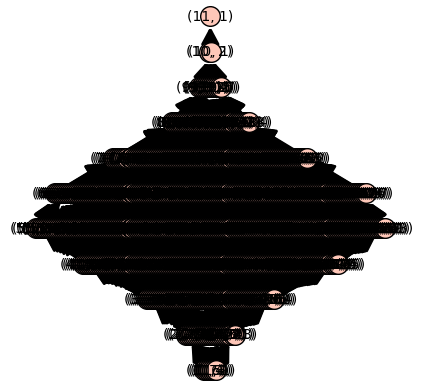

In [102]:
Poset(DiGraph(L)).show()

# Useful numbers

In [110]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))

n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))

6
703


# Number of syblings

In [73]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_unravel_symmetries.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        nbr = len(eval(fi.readline()))
        fi.close()
        
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'w')
        fi.write("Number of (normal equivalent classes of) generalized permutahedra that are equivalent (up to symmetries) to this generalized permutahedron studied here:\n")
        fi.write(str(nbr) + '\n\n')
        fi.close()

6


In [74]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_unravel_symmetries.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        nbr = len(eval(fi.readline()))
        fi.close()
        
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'w')
        fi.write("Number of (normal equivalent classes of) generalized permutahedra that are equivalent (up to symmetries) to this generalized permutahedron studied here:\n")
        fi.write(str(nbr) + '\n\n')
        fi.close()

703


# Face lattice info

In [75]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/face_lattice.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
nFL = Poset(DiGraph([eval(xy) for xy in fi.readlines()]))
fi.close()
print(nFL)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Covers (in face lattice):\n")
        fi.write(str(nFL.lower_covers((k, l))) + '\n\n')
        
        fi.write("Is covered by (in face lattice):\n")
        fi.write(str(nFL.upper_covers((k, l))) + '\n\n')
        
        fi.write("Rays under (i.e. Minkowski indecomposable deformations of this present generalized permutahedron):\n")
        fi.write(str([kl for kl in nFL.minimal_elements() if nFL.compare_elements(kl, (k, l)) == -1]) + '\n\n')
        
        fi.write("Facets above (in face lattice):\n")
        fi.write(str([(2^n-n-2, x) for x in range(1, lens[2^n-n-2]+1) if nFL.compare_elements((2^n-n-2, x), (k, l)) == 1]) + '\n\n')
        fi.close()

6
Finite poset containing 6 elements


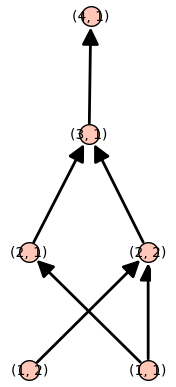

In [131]:
nFL.show()

In [76]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/face_lattice.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
nFL = Poset(DiGraph([eval(xy) for xy in fi.readlines()]))
fi.close()
print(nFL)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Covers (in face lattice):\n")
        fi.write(str(nFL.lower_covers((k, l))) + '\n\n')
        
        fi.write("Is covered by (in face lattice):\n")
        fi.write(str(nFL.upper_covers((k, l))) + '\n\n')
        
        fi.write("Rays under (i.e. Minkowski indecomposable deformations of this present generalized permutahedron):\n")
        fi.write(str([kl for kl in nFL.minimal_elements() if nFL.compare_elements(kl, (k, l)) == -1]) + '\n\n')
        
        fi.write("Facets above (in face lattice):\n")
        fi.write(str([(2^n-n-2, x) for x in range(1, lens[2^n-n-2]+1) if nFL.compare_elements((2^n-n-2, x), (k, l)) == 1]) + '\n\n')
        fi.close()

703
Finite poset containing 703 elements


# Dimension & f-vector

In [77]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        P = Polyhedron(vertices=[eval(li) for li in fi.readlines()])
        fi.close()
        
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Dimension of this generalized permutahedron studied here:" + '\n')
        fi.write(str(P.dim()) + '\n\n')
        fi.write("f-vector of this generalized permutahedron studied here:" + '\n')
        fi.write(str(P.f_vector()) + '\n\n')
        fi.close()

6



In [78]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        P = Polyhedron(vertices=[eval(li) for li in fi.readlines()])
        fi.close()
        
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Dimension of this generalized permutahedron studied here:" + '\n')
        fi.write(str(P.dim()) + '\n\n')
        fi.write("f-vector of this generalized permutahedron studied here:" + '\n')
        fi.write(str(P.f_vector()) + '\n\n')
        fi.close()

703



# Sanity check !
Check if they are all indeed generalized permutahedra...

In [124]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi.readlines()])
        fi.close()
        if not is_generalized_permutahedron(P):
            print("Problem", k, l)

6



In [125]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi.readlines()])
        fi.close()
        if not is_generalized_permutahedron(P):
            print("Problem", k, l)

703



# Graphical Zonotopes

In [79]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Graphical Zonotope for G with edges:\n")
        fi.close()

for G in graphs(n):
    if len(G.edges()) >= 1:
        Z_G = graphical_zonotope(G)
        diG = braid_merging(Z_G.vertices(), n)
        k = G.clique_polynomial(1) - n - 1
#         G.show()
#         print(k, diG)
        for l in range(1, lens[k]+1):
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'r')
            di = eval(fi.readline())
#             print(di)
            di = {x : [Permutation(p) for p in di[x]] for x in di}
            fi.close()
            if are_braid_equivalent(diG, di):
#                 print(l)
                Seen.append((k, l))
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'a')
                fi.write(str([(e[0], e[1]) for e in G.edges()]) + '\n')
                fi.close()
                break

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6



In [80]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Graphical Zonotope for G with edges:\n")
        fi.close()

for G in graphs(n):
    if len(G.edges()) >= 1:
        Z_G = graphical_zonotope(G)
        diG = braid_merging(Z_G.vertices(), n)
        k = G.clique_polynomial(1) - n - 1
#         G.show()
#         print(k, diG)
        for l in range(1, lens[k]+1):
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'r')
            di = eval(fi.readline())
#             print(di)
            di = {x : [Permutation(p) for p in di[x]] for x in di}
            fi.close()
            if are_braid_equivalent(diG, di):
#                 print(l)
                Seen.append((k, l))
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'a')
                fi.write(str([(e[0], e[1]) for e in G.edges()]) + '\n')
                fi.close()
                break

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703



# Nestohedra

In [84]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Nestohedron for B with blocks:\n")
        fi.close()

c = 0
for k in range(1, 2^n - n):
    for B in hypergraphs.nauty(k, n, set_min_size=2):
        if is_building_set(B):
            c += 1
            N_B = hypergraphic_polytope(B, n)
            diB = braid_merging(N_B.vertices(), n)
#             print(k, diB)
            b = False
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
#                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diB, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(B) + '\n')
                    fi.close()
                    break
            if not b:
                print("Problem", B, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

[(1, 1), (1, 2), (2, 2), (3, 1), (4, 1)]
5


In [85]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Nestohedron for B with blocks:\n")
        fi.close()

c = 0
for k in range(1, 2^n - n):
    for B in hypergraphs.nauty(k, n, set_min_size=2):
        if is_building_set(B):
            c += 1
            N_B = hypergraphic_polytope(B, n)
            diB = braid_merging(N_B.vertices(), n)
#             print(k, diB)
            b = False
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
#                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diB, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(B) + '\n')
                    fi.close()
                    break
            if not b:
                print("Problem", B, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

[(1, 3), (1, 2), (1, 1), (2, 10), (2, 4), (2, 3), (2, 1), (3, 11), (3, 17), (3, 2), (3, 4), (3, 1), (4, 43), (4, 5), (4, 18), (4, 1), (4, 2), (4, 13), (4, 48), (5, 35), (5, 1), (5, 2), (5, 14), (5, 8), (5, 46), (5, 48), (5, 174), (6, 12), (6, 23), (6, 24), (6, 2), (6, 28), (6, 155), (7, 5), (7, 7), (7, 97), (7, 6), (7, 96), (8, 38), (8, 1), (8, 39), (8, 37), (9, 12), (9, 11), (10, 2), (11, 1)]
46


# Hypergraphic polytopes

In [86]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Hypergraphic Polytope for H with hyper-edges:\n")
        fi.close()

c = 0
for K in range(1, 2^n - n):
    for B in hypergraphs.nauty(K, n, set_min_size=2):
        c += 1
        N_B = hypergraphic_polytope(B, n)
        diB = braid_merging(N_B.vertices(), n)
#             print(k, diB)
        b = False
        for k in range(K, 2^n - n):
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
    #                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diB, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(B) + '\n')
                    fi.close()
                    break
            if b:
                break
        if not b:
            print("Problem", B, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

[(1, 1), (1, 2), (2, 1), (2, 2), (4, 1), (3, 1), (4, 1)]
7


In [87]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Hypergraphic Polytope for H with hyper-edges:\n")
        fi.close()

c = 0
for K in range(1, 2^n - n):
    for B in hypergraphs.nauty(K, n, set_min_size=2):
        c += 1
        N_B = hypergraphic_polytope(B, n)
        diB = braid_merging(N_B.vertices(), n)
#             print(k, diB)
        b = False
        for k in range(K, 2^n - n):
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
    #                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diB, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(B) + '\n')
                    fi.close()
                    break
            if b:
                break
        if not b:
            print("Problem", B, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

[(1, 3), (1, 2), (1, 1), (2, 8), (2, 10), (2, 4), (2, 5), (2, 3), (2, 2), (2, 1), (4, 43), (3, 16), (3, 19), (3, 11), (3, 10), (3, 12), (3, 9), (3, 18), (3, 17), (3, 3), (3, 5), (3, 2), (4, 13), (3, 4), (4, 48), (3, 1), (4, 43), (5, 36), (5, 35), (5, 45), (4, 17), (5, 131), (4, 16), (4, 6), (4, 8), (4, 5), (4, 9), (5, 5), (4, 4), (4, 7), (4, 89), (4, 21), (4, 22), (4, 20), (5, 14), (4, 19), (4, 18), (5, 46), (4, 1), (5, 48), (4, 2), (4, 13), (5, 174), (4, 48), (5, 36), (5, 35), (7, 5), (6, 12), (7, 20), (5, 45), (6, 22), (7, 43), (6, 21), (5, 7), (6, 100), (5, 6), (5, 131), (6, 24), (5, 1), (6, 23), (5, 2), (6, 67), (5, 3), (5, 5), (5, 102), (5, 101), (6, 4), (5, 10), (5, 12), (5, 9), (6, 62), (5, 11), (6, 28), (5, 14), (5, 8), (6, 155), (5, 46), (5, 48), (5, 174), (7, 5), (6, 12), (8, 38), (7, 5), (6, 22), (7, 43), (6, 21), (8, 1), (8, 29), (7, 4), (7, 43), (7, 7), (7, 91), (6, 1), (6, 100), (6, 23), (7, 97), (6, 24), (6, 67), (11, 1), (7, 20), (9, 3), (8, 18), (7, 17), (6, 64), 

# Shard polytopes

In [91]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Shard Polytope for arc:\n")
        fi.close()

c = 0
k = 1
for alpha in all_arcs(n):
    c += 1
    SP = shard_polytope(alpha, n)
    diSP = braid_merging(SP.vertices(), n)
#             print(k, diB)
    b = False
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        di = eval(fi.readline())
#                 print(di)
        di = {x : [Permutation(p) for p in di[x]] for x in di}
        fi.close()
        b = are_braid_equivalent(diSP, di)
        if b:
            Seen.append((k, l))
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'a')
            fi.write(str(alpha) + '\n')
            fi.close()
            break
    if not b:
        print("Problem", alpha, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

[(1, 1), (1, 2), (1, 2), (1, 1)]
4


In [92]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Shard Polytope for arc:\n")
        fi.close()

c = 0
k = 1
for alpha in all_arcs(n):
    c += 1
    SP = shard_polytope(alpha, n)
    diSP = braid_merging(SP.vertices(), n)
#             print(k, diB)
    b = False
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        di = eval(fi.readline())
#                 print(di)
        di = {x : [Permutation(p) for p in di[x]] for x in di}
        fi.close()
        b = are_braid_equivalent(diSP, di)
        if b:
            Seen.append((k, l))
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'a')
            fi.write(str(alpha) + '\n')
            fi.close()
            break
    if not b:
        print("Problem", alpha, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

[(1, 3), (1, 2), (1, 2), (1, 1), (1, 4), (1, 4), (1, 1), (1, 3), (1, 2), (1, 2), (1, 3)]
11


# Quotientopes

In [100]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Quotientope for arc diagram A with arcs:\n")
        fi.close()

c = 0
for Id in arc_ideals_poset(n).list():
    if len(Id) >= 1:
        c += 1
        Q = quotientope(Id, n)
        k = len(Id)
        diQ = braid_merging(Q.vertices(), n)
    #             print(k, diB)
        b = False
        for l in range(1, lens[k]+1):
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'r')
            di = eval(fi.readline())
    #                 print(di)
            di = {x : [Permutation(p) for p in di[x]] for x in di}
            fi.close()
            b = are_braid_equivalent(diQ, di)
            if b:
                Seen.append((k, l))
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'a')
                fi.write(str(list(Id)) + '\n')
                fi.close()
                break
        if not b:
            print("Problem", Id, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

[(1, 1), (1, 1), (2, 1), (3, 1), (3, 1), (4, 1)]
6


In [101]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Quotientope for arc diagram A with arcs:\n")
        fi.close()

c = 0
for Id in arc_ideals_poset(n).list():
    if len(Id) >= 1:
        c += 1
        Q = quotientope(Id, n)
        k = len(Id)
        diQ = braid_merging(Q.vertices(), n)
    #             print(k, diB)
        b = False
        for l in range(1, lens[k]+1):
            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
            fi = open(name, 'r')
            di = eval(fi.readline())
    #                 print(di)
            di = {x : [Permutation(p) for p in di[x]] for x in di}
            fi.close()
            b = are_braid_equivalent(diQ, di)
            if b:
                Seen.append((k, l))
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'a')
                fi.write(str(list(Id)) + '\n')
                fi.close()
                break
        if not b:
            print("Problem", Id, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

[(1, 3), (1, 3), (1, 3), (2, 8), (2, 10), (2, 8), (3, 19), (3, 11), (3, 11), (3, 11), (3, 11), (4, 21), (4, 21), (4, 21), (4, 21), (4, 43), (5, 45), (5, 41), (5, 10), (5, 10), (5, 41), (6, 22), (6, 22), (4, 43), (5, 45), (6, 22), (6, 2), (6, 18), (6, 22), (7, 8), (7, 4), (7, 20), (7, 4), (7, 8), (8, 31), (8, 1), (6, 2), (6, 18), (7, 8), (7, 8), (7, 4), (7, 4), (8, 31), (8, 1), (8, 18), (9, 3), (8, 1), (8, 18), (9, 3), (8, 1), (9, 3), (9, 6), (9, 10), (10, 1), (10, 2), (9, 3), (10, 2), (10, 1), (11, 1)]
59


# Matroid polytopes

In [154]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}

sentence = "Matroid Polytope for matroid M with bases:\n"

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        cont = fi.read()
        fi.close()
        cont = cont[:cont.find(sentence)+len(sentence)]
        fi = open(name, 'w')
        fi.write(cont)
        fi.close()

In [155]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []

# for k in range(1, 2^n - n):
#     for l in range(1, lens[k]+1):
#         name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
#         fi = open(name, 'a')
#         fi.write("Matroid Polytope for matroid M with bases:\n")
#         fi.close()

c = 0
for M in all_matroids(n):
    if len(M) >= 2:
#         print(M)
        c += 1
        MP = matroid_polytope(M, n)
#         print(MP)
        k = len(Id)
        diM = braid_merging(MP.vertices(), n)
    #             print(k, diB)
        b = False
        for k in range(1, 2^n - n):
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
        #                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diM, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(list(M)) + '\n')
                    fi.close()
                    break
            if b:
                break
        if not b:
            print("Problem", M, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

[(1, 1), (1, 1), (1, 1), (1, 2), (1, 1), (1, 1), (1, 1), (1, 2)]
8


In [156]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}

sentence = "Matroid Polytope for matroid M with bases:\n"

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'r')
        cont = fi.read()
        fi.close()
        cont = cont[:cont.find(sentence)+len(sentence)]
        fi = open(name, 'w')
        fi.write(cont)
        fi.close()

In [157]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []

# for k in range(1, 2^n - n):
#     for l in range(1, lens[k]+1):
#         name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
#         fi = open(name, 'a')
#         fi.write("Matroid Polytope for matroid M with bases:\n")
#         fi.close()

c = 0
for M in all_matroids(n):
    if len(M) >= 2:
#         print(M)
        c += 1
        MP = matroid_polytope(M, n)
#         print(MP)
        k = len(Id)
        diM = braid_merging(MP.vertices(), n)
    #             print(k, diB)
        b = False
        for k in range(1, 2^n - n):
            for l in range(1, lens[k]+1):
                name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi = open(name, 'r')
                di = eval(fi.readline())
        #                 print(di)
                di = {x : [Permutation(p) for p in di[x]] for x in di}
                fi.close()
                b = are_braid_equivalent(diM, di)
                if b:
                    Seen.append((k, l))
                    name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                    fi = open(name, 'a')
                    fi.write(str(list(M)) + '\n')
                    fi.close()
                    break
            if b:
                break
        if not b:
            print("Problem", M, k)

print(Seen)
print(c)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

[(1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 2), (1, 2), (1, 2), (1, 2), (1, 1), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (1, 2), (2, 10), (2, 10), (2, 10), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 6), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 3), (1, 2), (1, 2), (1, 2), (1, 2), (1, 1)]
52


# Alcove polytopes

In [154]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []
c = 0

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi2.readlines()])
        fi2.close()
        Eq, Iq = redress_normals_into_01(P)
        print("Eq:")
        for eq in Eq:
            print(eq)
        print("Iq:")
        for iq in Iq:
            print(iq)
        print()
        
print(c)        

6

Eq:
[(0, 1, 0), (1, 0, 1)]
[(1, 1, 1), (0, 1, 0)]
[(1, 1, 1), (1, 0, 1)]
Iq:
[(0, 0, 1), (0, 1, 1)]
[(1, 0, 0), (1, 1, 0)]

Eq:
[(1, 1, 1)]
Iq:
[(0, 0, 1)]
[(0, 1, 0)]
[(1, 0, 0)]

Eq:
[(1, 1, 1)]
Iq:
[(0, 0, 1)]
[(0, 1, 0)]
[(1, 1, 0)]
[(1, 0, 1)]

Eq:
[(1, 1, 1)]
Iq:
[(0, 0, 1)]
[(1, 0, 1)]
[(1, 0, 0)]
[(0, 1, 0)]

Eq:
[(1, 1, 1)]
Iq:
[(0, 0, 1)]
[(0, 1, 0)]
[(1, 0, 1)]
[(1, 0, 0)]
[(1, 1, 0)]

Eq:
[(1, 1, 1)]
Iq:
[(0, 1, 1)]
[(0, 0, 1)]
[(0, 1, 0)]
[(1, 0, 1)]
[(1, 0, 0)]
[(1, 1, 0)]

0


In [155]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = []
c = 0

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi2.readlines()])
        fi2.close()
        if P.dim() < n-1:
            Eq, Iq = redress_normals_into_01(P)
            print("Eq:")
            for eq in Eq:
                print(eq)
            print("Iq:")
            for iq in Iq:
                print(iq)
            print()
        
print(c)        

703

Eq:
[(1, 1, 0, 1), (0, 0, 1, 0)]
[(1, 1, 1, 1), (0, 0, 1, 0)]
[(1, 1, 0, 1), (1, 1, 1, 1)]
Iq:
[(0, 1, 0, 1), (0, 1, 1, 1)]
[(1, 0, 0, 1), (1, 0, 1, 1)]
[(1, 1, 0, 0), (1, 1, 1, 0)]

Eq:
[(1, 1, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0)]
[(0, 0, 0, 1), (1, 1, 1, 0), (0, 0, 1, 0)]
[(0, 0, 0, 1), (1, 1, 1, 1), (0, 0, 1, 0)]
[(1, 1, 0, 1), (0, 0, 0, 1), (0, 0, 1, 0)]
[(1, 1, 0, 0), (0, 0, 0, 1), (0, 0, 1, 1)]
[(0, 0, 0, 1), (1, 1, 1, 0), (0, 0, 1, 1)]
[(0, 0, 0, 1), (1, 1, 1, 1), (0, 0, 1, 1)]
[(1, 1, 0, 1), (0, 0, 0, 1), (0, 0, 1, 1)]
[(1, 1, 0, 0), (0, 0, 0, 1), (1, 1, 1, 0)]
[(1, 1, 0, 0), (0, 0, 0, 1), (1, 1, 1, 1)]
[(1, 1, 0, 1), (0, 0, 0, 1), (1, 1, 1, 0)]
[(1, 1, 0, 1), (0, 0, 0, 1), (1, 1, 1, 1)]
[(1, 1, 0, 0), (0, 0, 1, 0), (0, 0, 1, 1)]
[(1, 1, 1, 0), (0, 0, 1, 0), (0, 0, 1, 1)]
[(1, 1, 1, 1), (0, 0, 1, 0), (0, 0, 1, 1)]
[(1, 1, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1)]
[(1, 1, 0, 0), (1, 1, 1, 1), (0, 0, 1, 0)]
[(1, 1, 0, 1), (1, 1, 0, 0), (0, 0, 1, 0)]
[(1, 1, 1, 0), (1, 1, 1, 1), (0, 0

In [174]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

Seen = []
c = 0

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi2.readlines()])
        fi2.close()
#        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
#        fi = open(name, 'a')
#        fi.write("Polypositroid (i.e. Alcoved Polytope and Generalized Permutahedron):\n")
        print(P)
        print(is_alcoved_polytope(P))
        print(is_alcoved_polytope_symmetrically(P))
#        b = is_symmetrically_alcoved_polytope(P)
#        fi.write(str(b)+'\n\n')
#        fi.close()
        c += int(b)
        
print(c)        

6

A 1-dimensional polyhedron in ZZ^3 defined as the convex hull of 2 vertices
True
True
A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 3 vertices
True
True
A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 4 vertices
True
True
A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 4 vertices
True
True
A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 5 vertices
True
True
A 2-dimensional polyhedron in ZZ^3 defined as the convex hull of 6 vertices
True
True
6


In [173]:
P = polytopes.permutahedron(4)
print(P)
print(is_alcoved_polytope(P))
print(is_alcoved_polytope_symmetrically(P))
Eq, Iq = redress_normals_into_01(P)
sig = [1, 2, 0, 3]
print("Eq:")
for eq in Eq:
    print(eq, [perm_vec(e, sig) for e in eq])
print("Iq:")
for iq in Iq:
    print(iq, [perm_vec(e, sig) for e in iq])

A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 24 vertices
False
False
Eq:
[(1, 1, 1, 1)] [(1, 1, 1, 1)]
Iq:
[(0, 0, 0, 1)] [(0, 0, 0, 1)]
[(1, 1, 1, 0)] [(1, 1, 1, 0)]
[(1, 1, 0, 1)] [(1, 0, 1, 1)]
[(1, 1, 0, 0)] [(1, 0, 1, 0)]
[(1, 0, 1, 1)] [(0, 1, 1, 1)]
[(1, 0, 1, 0)] [(0, 1, 1, 0)]
[(1, 0, 0, 1)] [(0, 0, 1, 1)]
[(1, 0, 0, 0)] [(0, 0, 1, 0)]
[(0, 1, 1, 1)] [(1, 1, 0, 1)]
[(0, 1, 1, 0)] [(1, 1, 0, 0)]
[(0, 1, 0, 1)] [(1, 0, 0, 1)]
[(0, 1, 0, 0)] [(1, 0, 0, 0)]
[(0, 0, 1, 1)] [(0, 1, 0, 1)]
[(0, 0, 1, 0)] [(0, 1, 0, 0)]


In [188]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

Seen = set()
c = 0

for k in range(1, 2^n - n):
    print("k =", k)
    for l in range(1, lens[k]+1):
        name2 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi2 = open(name2, 'r')
        P = Polyhedron(vertices = [eval(li) for li in fi2.readlines()])
        fi2.close()
#        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
#        fi = open(name, 'a')
#        fi.write("Polypositroid (i.e. Alcoved Polytope and Generalized Permutahedron):\n")
        b = is_alcoved_polytope_symmetrically(P)
#        fi.write(str(b)+'\n\n')
#        fi.close()
        if b:
            Seen.add((k, l))
        c += int(b)
        
print(c)
print(len(Seen))

703

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
323
323


# Removahedra

In [177]:
n = 3
SSS = Subsets([S for S in Subsets(range(n)) if not len(S) in {0, n}])
print(SSS)
print(len(SSS))

Subsets of {{0}, {1}, {2}, {0, 1}, {0, 2}, {1, 2}}
64


In [102]:
%%timeit
SSS.cardinality()

1.61 µs ± 80.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [180]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

SSS = Subsets([S for S in Subsets(range(n)) if not len(S) in {0, n}])
print(SSS)
print(len(SSS))

Seen = set()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Removahedron whose normal vectors are e_S for S in:\n")
        fi.close()

c = 0
nc = 0
nf = 0
ngp = 0
for SS in SSS:
    if len(SS) >= n:
        if (c + nc + nf + ngp) % 1000 == 0:
            print(len(Seen), c, nc, nf, ngp)
        Rem = removahedron(SS, n)
        if Rem.is_compact():
            if is_generalized_permutahedron(Rem):
                diR = braid_merging(Rem.vertices(), n)
            #             print(k, diB)
                b = False
                for k in range(1, 2^n - n):
                    for l in range(1, lens[k]+1):
                        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                        fi = open(name, 'r')
                        di = eval(fi.readline())
                #                 print(di)
                        di = {x : [Permutation(p) for p in di[x]] for x in di}
                        fi.close()
                        b = are_braid_equivalent(diR, di)
                        if b:
                            c += 1
                            Seen.add((k, l))
                            #print("Found", SS, Rem)
                            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                            fi = open(name, 'a')
                            fi.write(str(list(SS)) + '\n')
                            fi.close()
                            break
                    if b:
                        break
                if not b:
                    nf += 1
            else:
                name3 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/Removehedra_not_GP_but_compact.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi3 = open(name3, 'a')
                fi3.write(str(SS) + '\n')
                fi3.close()
                ngp += 1
                #print("Not found", SS, Rem)
        else:
            nc += 1

print(Seen)
print(c)
print(ngp)
print(nc)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

6

Subsets of {{0}, {1}, {2}, {0, 1}, {0, 2}, {1, 2}}
64
0 0 0 0 0
{(1, 2), (3, 1), (2, 1), (2, 2), (4, 1)}
18
0
24


In [181]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

SSS = Subsets([S for S in Subsets(range(n)) if not len(S) in {0, n}])
print(SSS)
print(len(SSS))

Seen = set()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        fi.write("Removahedron whose normal vectors are e_S for S in:\n")
        fi.close()

c = 0
nc = 0
nf = 0
ngp = 0
for SS in SSS:
    if len(SS) >= n:
        if (c + nc + nf + ngp) % 1000 == 0:
            print(len(Seen), c, nc, nf, ngp)
        Rem = removahedron(SS, n)
        if Rem.is_compact():
            if is_generalized_permutahedron(Rem):
                diR = braid_merging(Rem.vertices(), n)
            #             print(k, diB)
                b = False
                for k in range(1, 2^n - n):
                    for l in range(1, lens[k]+1):
                        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_fan_as_merging.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                        fi = open(name, 'r')
                        di = eval(fi.readline())
                #                 print(di)
                        di = {x : [Permutation(p) for p in di[x]] for x in di}
                        fi.close()
                        b = are_braid_equivalent(diR, di)
                        if b:
                            c += 1
                            Seen.add((k, l))
                            #print("Found", SS, Rem)
                            name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                            fi = open(name, 'a')
                            fi.write(str(list(SS)) + '\n')
                            fi.close()
                            break
                    if b:
                        break
                if not b:
                    nf += 1
            else:
                name3 = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/Removehedra_not_GP_but_compact.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
                fi3 = open(name3, 'a')
                fi3.write(str(SS) + '\n')
                fi3.close()
                ngp += 1
                #print("Not found", SS, Rem)
        else:
            nc += 1

print(Seen)
print(c)
print(ngp)
print(nc)

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
        fi = open(name, 'a')
        if not (k, l) in Seen:
            fi.write("None" + '\n\n')
        else:
            fi.write('\n')
        fi.close()

703

Subsets of {{0}, {1}, {2}, {3}, {0, 1}, {0, 2}, {0, 3}, {1, 2}, {1, 3}, {2, 3}, {0, 1, 2}, {0, 1, 3}, {0, 2, 3}, {1, 2, 3}}
16384
0 0 0 0 0
1 1 979 0 20
5 33 1859 0 108
5 50 2706 0 244
16 154 3362 0 484
16 208 4009 0 783
16 248 4602 0 1150
27 408 4983 0 1609
27 478 5395 0 2127
27 532 5784 0 2684
39 656 6003 0 3341
39 730 6214 0 4056
39 782 6392 0 4826
46 892 6489 0 5619
46 955 6564 0 6481
51 1044 6588 0 7368
{(4, 8), (2, 18), (4, 18), (5, 172), (9, 8), (7, 7), (2, 1), (6, 2), (1, 6), (5, 32), (3, 7), (2, 5), (3, 17), (4, 33), (5, 1), (4, 66), (3, 24), (4, 19), (8, 1), (3, 10), (3, 20), (7, 24), (1, 5), (4, 23), (3, 31), (11, 1), (2, 2), (3, 16), (2, 15), (4, 24), (4, 1), (1, 1), (5, 35), (3, 2), (2, 6), (6, 18), (4, 5), (1, 4), (6, 30), (7, 89), (5, 52), (2, 3), (3, 19), (5, 90), (6, 12), (6, 26), (3, 5), (2, 7), (4, 29), (4, 17), (5, 45), (4, 59), (5, 14), (3, 18), (4, 54), (4, 21), (3, 49), (3, 4)}
1128
8193
6593


In [186]:
2^14 - 6593

9791

In [187]:
1128 + 8193

9321

# Properties

In [192]:
n = 3
lens = {1: 2, 2: 2, 3: 1, 4: 1}
print(sum(lens.values()))
print()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H",str(n)).replace("K",str(k)).replace('L',str(l))
        properties = []
        fi = open(name, 'r')
        content = fi.read()
        fi.close()
        posZG = content.find("Graphical") + len("Graphical Zonotope for G with edges:") +1
        if content[posZG] != 'N':
            properties.append("Graphical Zonotope")

        posNB = content.find("Nestohedron") + len("Nestohedron for B with blocks:") +1
        if content[posNB] != 'N':
            properties.append("Nestohedron")

        posHPH = content.find("Hypergraphic") + len("Hypergraphic Polytope for H with hyper-edges:") +1
        if content[posHPH] != 'N':
            properties.append("Hypergraphic Polytope")

        posQuo = content.find("Quotientope") + len("Quotientope for arc diagram A with arcs:") +1
        if content[posQuo] != 'N':
            properties.append("Quotientope")

        posSha = content.find("Shard") + len("Shard polytope for arc:") +1
        if content[posSha] != 'N':
            properties.append("Shard Polytope")

        posMat = content.find("Matroid") + len("Matroid Polytope for matroid M with bases:") +1
        if content[posMat] != 'N':
            properties.append("Matroid Polytope")

        posPosi = content.find("Polypositroid") + len("Polypositroid (i.e. Alcoved Polytope and Generalized Permutahedron):") +1
        if content[posMat] != 'F':
            properties.append("Polypositroid")

        posRem = content.find("Removahedron") + len("Removahedron whose normal vectors are e_S for S in:") +1
        if content[posRem] != 'N':
            properties.append("Removahedron")

        posIns = content.find("Graphical")
        content = content[:posIns] + "This generalized permutahedron studied here belongs to the following classes (details below):\n" + str(properties) + '\n\n' + content[posIns:]

        fi = open(name, 'w')
        fi.write(content)
        fi.close()

6



In [193]:
n = 4
lens = {1: 7, 2: 25, 3: 64, 4: 127, 5: 174, 6: 155, 7: 97, 8: 39, 9: 12, 10: 2, 11: 1}
print(sum(lens.values()))
print()

for k in range(1, 2^n - n):
    for l in range(1, lens[k]+1):
        name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H",str(n)).replace("K",str(k)).replace('L',str(l))
        properties = []
        fi = open(name, 'r')
        content = fi.read()
        fi.close()
        posZG = content.find("Graphical") + len("Graphical Zonotope for G with edges:") +1
        if content[posZG] != 'N':
            properties.append("Graphical Zonotope")

        posNB = content.find("Nestohedron") + len("Nestohedron for B with blocks:") +1
        if content[posNB] != 'N':
            properties.append("Nestohedron")

        posHPH = content.find("Hypergraphic") + len("Hypergraphic Polytope for H with hyper-edges:") +1
        if content[posHPH] != 'N':
            properties.append("Hypergraphic Polytope")

        posQuo = content.find("Quotientope") + len("Quotientope for arc diagram A with arcs:") +1
        if content[posQuo] != 'N':
            properties.append("Quotientope")

        posSha = content.find("Shard") + len("Shard polytope for arc:") +1
        if content[posSha] != 'N':
            properties.append("Shard Polytope")

        posMat = content.find("Matroid") + len("Matroid Polytope for matroid M with bases:") +1
        if content[posMat] != 'N':
            properties.append("Matroid Polytope")

        posPosi = content.find("Polypositroid") + len("Polypositroid (i.e. Alcoved Polytope and Generalized Permutahedron):") +1
        if content[posMat] != 'F':
            properties.append("Polypositroid")

        posRem = content.find("Removahedron") + len("Removahedron whose normal vectors are e_S for S in:") +1
        if content[posRem] != 'N':
            properties.append("Removahedron")

        posIns = content.find("Graphical")
        content = content[:posIns] + "This generalized permutahedron studied here belongs to the following classes (details below):\n" + str(properties) + '\n\n' + content[posIns:]

        fi = open(name, 'w')
        fi.write(content)
        fi.close()

703



# Face lattice drawings

# Some examples

### Ex1: Minkowski indecomposable not Matroid Polytope (nor anything else)

In [16]:
n = 4
k = 1
l = 7

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
print(fi.read())
fi.close()

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
P = Polyhedron(vertices = [eval(li) for li in fi.readlines()])
fi.close()
print(P)
for v in P.vertices():
    print(v)
P.show()
Q = P.affine_hull_projection(orthonormal=True, extend = True)
print(Q)
for v in Q.vertices():
    print(tuple([round(x, 4) for x in v.vector()]))
Q.show()

Number of (normal equivalent classes of) generalized permutahedra that are equivalent (up to symmetries) to this generalized permutahedron studied here:
6

Covers (in face lattice):
[]

Is covered by (in face lattice):
[(2, 24), (2, 23), (2, 25)]

Rays under (i.e. Minkowski indecomposable deformations of this present generalized permutahedron):
[]

Facets above (in face lattice):
[(10, 1), (10, 2)]

Dimension of this generalized permutahedron studied here:
3

f-vector of this generalized permutahedron studied here:
(1, 13, 24, 13, 1)

Graphical Zonotope for G with edges:
None

Nestohedron for B with blocks:
None

Hypergraphic Polytope for H with hyper-edges:
None

Shard Polytope for arc:
None

Quotientope for arc diagram A with arcs:
None

Matroid Polytope for matroid M with bases:
None


A 3-dimensional polyhedron in ZZ^4 defined as the convex hull of 13 vertices
A vertex at (0, 1, 1, -2)
A vertex at (0, 1, 2, -3)
A vertex at (0, 2, 0, -2)
A vertex at (0, 2, 1, -3)
A vertex at (1, 0, 

Graphics3d Object

A 3-dimensional polyhedron in AA^3 defined as the convex hull of 13 vertices
(0.7071, -0.4082, 2.3094)
(0.0, 0.8165, 2.3094)
(2.1213, -0.4082, 2.3094)
(1.4142, 0.8165, 2.3094)
(0.0, -0.8165, 1.1547)
(-0.7071, 0.4082, 1.1547)
(1.4142, -0.8165, 1.1547)
(0.0, 1.633, 1.1547)
(2.1213, 0.4082, 1.1547)
(1.4142, 1.633, 1.1547)
(0.0, -0.0, -0.0)
(1.4142, -0.0, -0.0)
(0.7071, 1.2247, -0.0)


Graphics3d Object

In [22]:
n = 4
k = 1
l = 2

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L_data.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
print(fi.read())
fi.close()

name = cur_repo + "/Downloads/GP_n=H_up_to_symmetries/K-face/L.txt".replace("H", str(n)).replace("K", str(k)).replace("L", str(l))
fi = open(name, 'r')
P = Polyhedron(vertices = [eval(li) for li in fi.readlines()])
fi.close()
print(P)

P.Hrepresentation()

Number of (normal equivalent classes of) generalized permutahedra that are equivalent (up to symmetries) to this generalized permutahedron studied here:
8

Covers (in face lattice):
[]

Is covered by (in face lattice):
[(2, 2), (2, 4), (2, 24), (2, 5), (2, 11), (2, 13), (2, 1), (2, 22), (2, 16), (2, 6), (2, 12)]

Rays under (i.e. Minkowski indecomposable deformations of this present generalized permutahedron):
[]

Facets above (in face lattice):
[(10, 1), (10, 2)]

Dimension of this generalized permutahedron studied here:
2

f-vector of this generalized permutahedron studied here:
(1, 3, 3, 1)

Graphical Zonotope for G with edges:
None

Nestohedron for B with blocks:
((0, 1, 2),)

Hypergraphic Polytope for H with hyper-edges:
((0, 1, 2),)

Shard Polytope for arc:
(0, 2, set(), {1})
(0, 2, {1}, set())
(1, 3, set(), {2})
(1, 3, {2}, set())

Quotientope for arc diagram A with arcs:
None

Matroid Polytope for matroid M with bases:
[(2,), (1,), (0,)]
[(3,), (1,), (0,)]
[(3,), (2,), (0,)]
[(

(An equation (0, 0, 1, 0) x + 0 == 0,
 An equation (1, 1, 0, 1) x + 0 == 0,
 An inequality (1, 0, 0, 0) x + 0 >= 0,
 An inequality (-1, 0, 0, -1) x + 0 >= 0,
 An inequality (0, 0, 0, 1) x + 1 >= 0)